In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout
import seaborn as sns;

In [5]:
import pandas as pd
#immport data
data_frame = pd.read_excel("01train.xlsx")
data_frame1 = pd.read_excel("data_anysis.xlsx")
data_frame.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


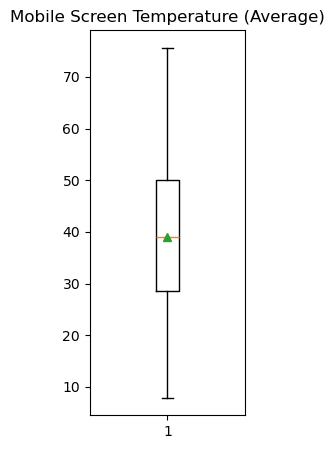

偏態(Skewness): -0.06
峰度(Kurtosis): -0.70


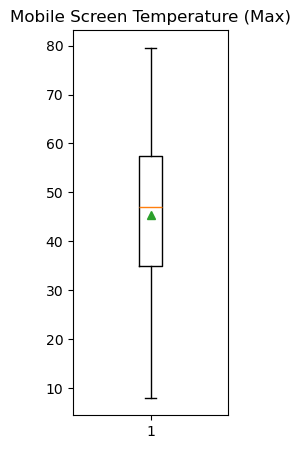

偏態(Skewness): -0.27
峰度(Kurtosis): -0.57


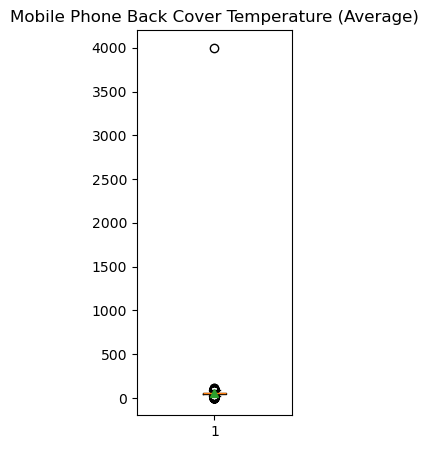

偏態(Skewness): 57.98
峰度(Kurtosis): 3533.85


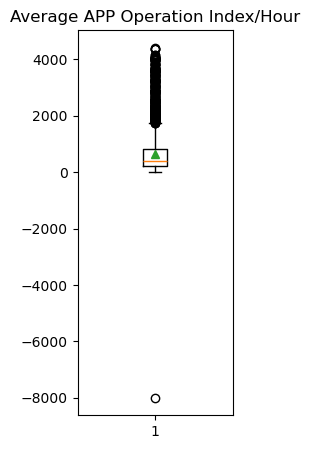

偏態(Skewness): 1.87
峰度(Kurtosis): 11.67


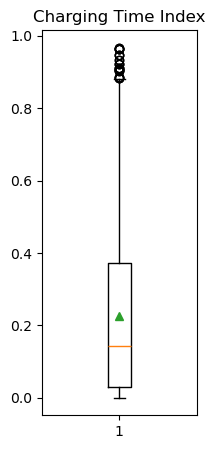

偏態(Skewness): 1.02
峰度(Kurtosis): 0.09


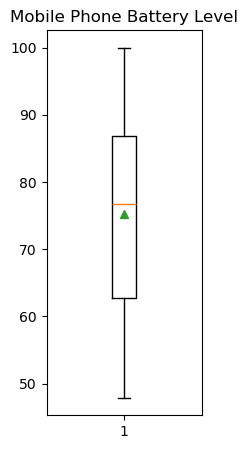

偏態(Skewness): -0.12
峰度(Kurtosis): -1.23


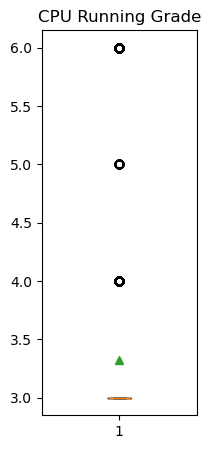

偏態(Skewness): 2.53
峰度(Kurtosis): 6.40


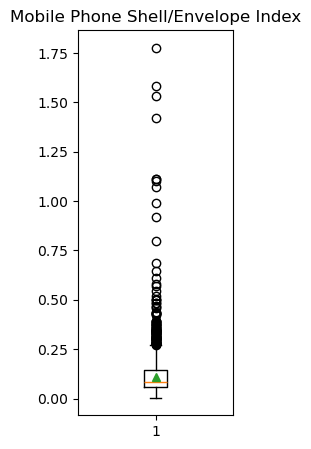

偏態(Skewness): 7.09
峰度(Kurtosis): 92.95


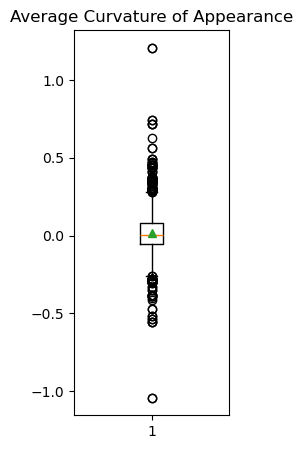

偏態(Skewness): 0.60
峰度(Kurtosis): 9.38


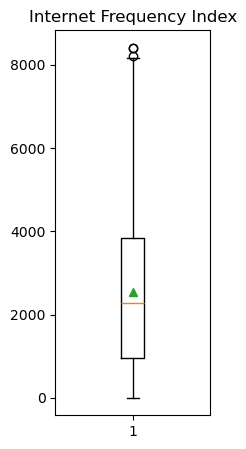

偏態(Skewness): 0.62
峰度(Kurtosis): -0.38


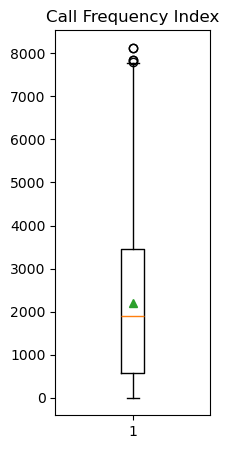

偏態(Skewness): 0.66
峰度(Kurtosis): -0.31


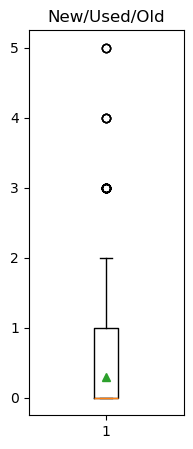

偏態(Skewness): 2.31
峰度(Kurtosis): 7.61


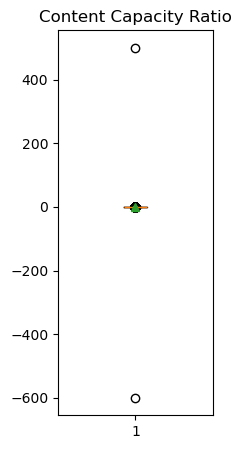

偏態(Skewness): -12.13
峰度(Kurtosis): 2015.74


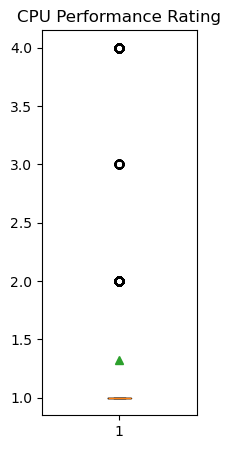

偏態(Skewness): 2.53
峰度(Kurtosis): 6.40


In [21]:
#資料分布
name_list=['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級','手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級','Underclocking']
name_pre=['Mobile Screen Temperature (Average)','Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Charging Time Index','Mobile Phone Battery Level','CPU Running Grade','Mobile Phone Shell/Envelope Index','Average Curvature of Appearance','Internet Frequency Index','Call Frequency Index','New/Used/Old','Content Capacity Ratio','CPU Performance Rating','Underclocking']

for i in range(14):
    plt.figure(figsize=(2,5))
    plt.boxplot(data_frame[name_list[i]],showmeans=True)   
    plt.title(name_pre[i])
    plt.show()
    print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
    print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
    print('==================================================================================================')

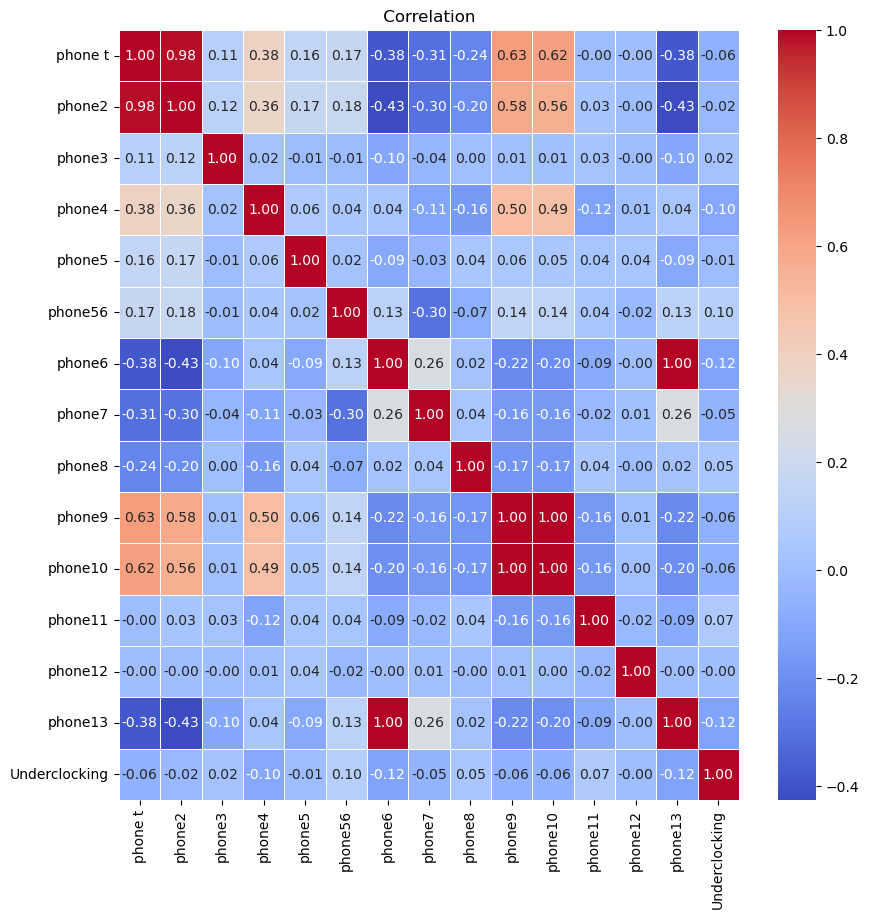

In [6]:

corr_matrix = data_frame1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
plt.title(' Correlation ')
plt.show()

In [7]:
import pandas as pd

y_data = data_frame['Underclocking'].to_numpy()

feature_ex = ['手機螢幕溫度(平均)','手機背蓋溫度(平均)', '平均APP運作指標/小時','充電時間指標', '手機電池電量','CPU跑分階級', '上網頻率指標','平均APP運作指標/小時']
x_data = data_frame[feature_ex].to_numpy()






In [8]:
#data arrange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()



x_data_normalized = min_max_scaler.fit_transform(x_data)
x_data_standardized = standard_scaler.fit_transform(x_data_normalized)
print(x_data_standardized)

[[ 1.36196208 -0.14775948 -0.59333444 ... -0.46710526  2.01233951
  -0.59333444]
 [ 0.91979281  0.08133125 -0.78703283 ...  0.99372152 -0.43924433
  -0.78703283]
 [-0.57155551 -0.24890221  0.25062121 ... -0.46710526  0.06882496
   0.25062121]
 ...
 [-1.3686788  -0.17215054 -0.75146126 ... -0.46710526 -1.34191914
  -0.75146126]
 [ 0.10751149  0.0796846  -0.54508763 ... -0.46710526  0.56544042
  -0.54508763]
 [ 1.30791917  0.02164005  2.85784632 ...  0.99372152  1.34819807
   2.85784632]]


In [9]:
from sklearn.model_selection import train_test_split
# 使用 train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data_standardized, y_data, test_size=0.15, random_state=1)

print("Xtrain shape:", Xtrain.shape)
print("Xtrain type:", type(Xtrain))
print("Xtest shape:", Xtest.shape)
print("Xtest type:", type(Xtest))
print("ytrain shape:", ytrain.shape)
print("ytrain type:", type(ytrain))
print("ytest shape:", ytest.shape)
print("ytest type:", type(ytest))

Xtrain shape: (3317, 8)
Xtrain type: <class 'numpy.ndarray'>
Xtest shape: (586, 8)
Xtest type: <class 'numpy.ndarray'>
ytrain shape: (3317,)
ytrain type: <class 'numpy.ndarray'>
ytest shape: (586,)
ytest type: <class 'numpy.ndarray'>


In [10]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.1)
input_features = x_data.shape[1]
print( x_data.shape[1])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(14, activation='leaky_relu'),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(2, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])
model.summary()



8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295 (1.15 KB)

 Trainable params: 295 (1.15 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(Xtrain, ytrain, batch_size=512, epochs=1000,validation_split=0.1 ) #default batch=32
print(history.history.keys())


Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5651 - loss: 0.6870 - val_accuracy: 0.5904 - val_loss: 0.6718
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 0.6645 - val_accuracy: 0.6145 - val_loss: 0.6507
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6225 - loss: 0.6519 - val_accuracy: 0.6506 - val_loss: 0.6396
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.6588 - val_accuracy: 0.6295 - val_loss: 0.6491
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6061 - loss: 0.6575 - val_accuracy: 0.6506 - val_loss: 0.6442
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 0.6463 - val_accuracy: 0.6325 - val_loss: 0.6410
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.6440 - val_accuracy: 0.6446 - val_loss: 0.6306
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6228 - loss: 0.6442 - val_accuracy: 0.6265 - val_loss

In [12]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.6905 - loss: 0.6494
Final test set loss: 0.665153
Final test set accuracy: 0.665529


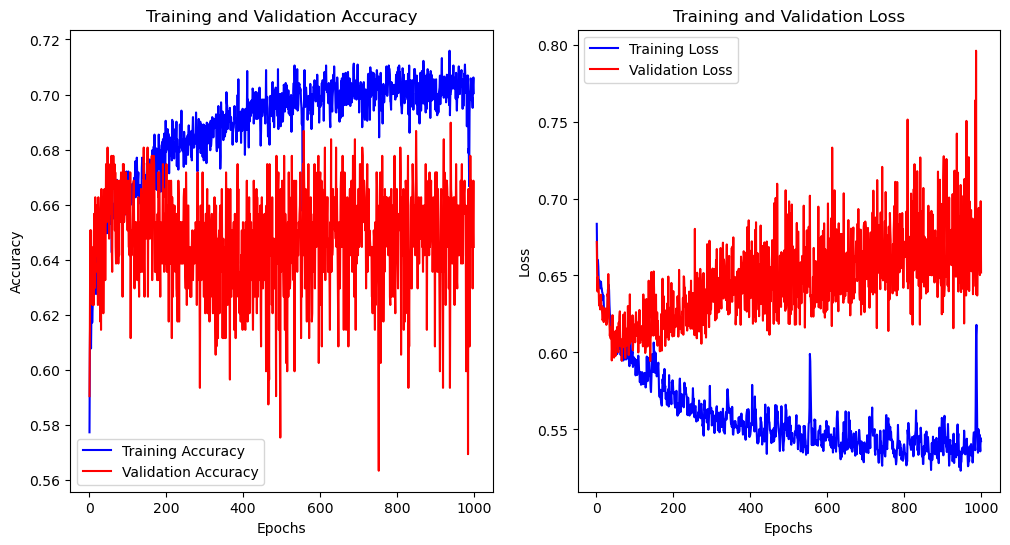

In [13]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()